#### 1. Definição do Problema

`Definir o problema de negócio:`

`Exemplo:` Nosso objetivo é prever o preço de imóveis na Califórnia com base em características como o número de quartos, localização, e tamanho do imóvel.
Especificar os objetivos e critérios de sucesso:

`Objetivo:` Desenvolver um modelo que possa prever o preço de imóveis com precisão suficiente para ser útil em avaliações de mercado.
Critérios de Sucesso: O modelo deve ter um erro médio absoluto (MAE) inferior a $50.000 e um R² superior a 0,7.
Compreender os requisitos do projeto:

`Requisitos:` Dados detalhados sobre características dos imóveis e preços, capacidade computacional para treinar modelos complexos, e ferramentas de visualização e análise.

#### 2. Coleta de Dados

`Identificar fontes de dados:`

Utilizaremos o dataset de preços de imóveis da Califórnia disponível no scikit-learn.
Coletar e agregar dados:

Código para carregar o dataset:

In [1]:
from sklearn.datasets import fetch_california_housing

# Carregar dados
cali_data = fetch_california_housing()
X, y = cali_data.data, cali_data.target
feature_names = cali_data.feature_names

#### 3. Exploração e Pré-processamento de Dados

Realizar análise exploratória de dados (EDA):

- Visualização das distribuições dos dados:

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


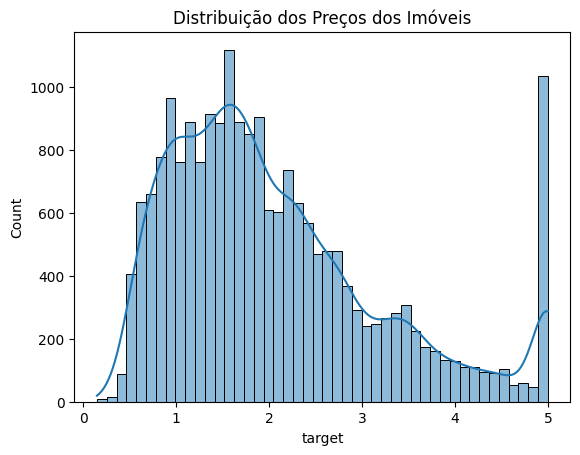

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
display(df.head())

# salva arquivo
df.to_csv('../data/immobile.csv', index=False)

# Visualizar distribuições
sns.histplot(df['target'], kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.show()

- Identificar outliers e valores ausentes:

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


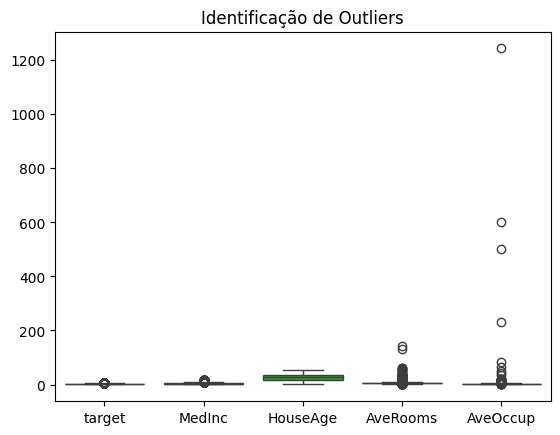

In [6]:
# Verificar valores ausentes
print(df.isnull().sum())

# Identificar outliers com boxplots
sns.boxplot(data=df[['target', 'MedInc', 'HouseAge', 'AveRooms', 'AveOccup']])
plt.title('Identificação de Outliers')
plt.show()

`Limpar e pré-processar dados:`
- Lidar com valores ausentes: Neste dataset, não há valores ausentes.
- Normalizar ou padronizar dados:
- Codificar variáveis categóricas: Não aplicável aqui, pois todos os dados são numéricos.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 4. Engenharia de Features
Criar novas features a partir dos dados existentes:

Exemplo: Criar uma feature de "densidade de ocupação" como a razão entre o número de quartos e a ocupação.

In [8]:
df['RoomDensity'] = df['AveRooms'] / df['AveOccup']

Selecionar features relevantes:

- Exemplo: Usar correlação para selecionar features.

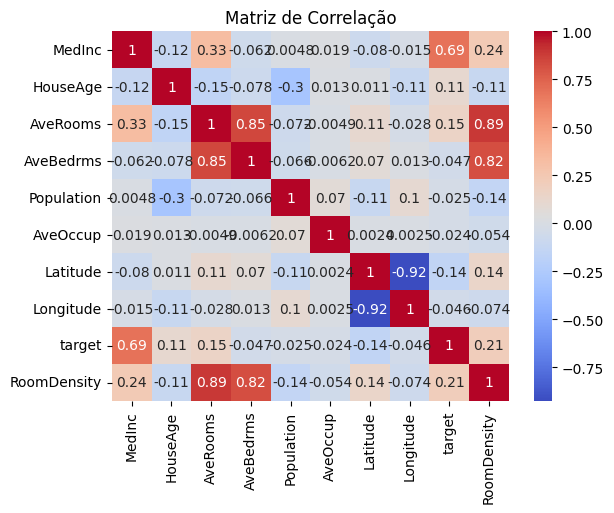

In [9]:
# Análise de correlação
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#### 5. Seleção de Modelos

Escolher algoritmos apropriados:
- Modelos comuns para regressão: Regressão Linear, Ridge, Lasso, Decision Tree, Random Forest, e Gradient Boosting.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
    print(f'{name} - MAE: {-scores.mean()}')

Linear Regression - MAE: 0.5474961907866824
Ridge Regression - MAE: 0.5474925876562288
Lasso Regression - MAE: 0.9249632954176384
Random Forest - MAE: 0.4646610043507753


#### 6. Treinamento de Modelos

- Dividir dados em conjuntos de treinamento e validação:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- Treinar modelos usando os algoritmos selecionados:


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

- Ajustar hiperparâmetros usando grid search ou random search:

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

#### 7. Avaliação de Modelos

Avaliar modelos usando métricas apropriadas:

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = grid_search.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'MAE: {mae}')
print(f'R²: {r2}')

MAE: 0.3249273515746126
R²: 0.8081700842600396


Realizar validação cruzada para avaliar o desempenho do modelo:

In [28]:
cross_val_scores = cross_val_score(grid_search, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'MAE médio de validação cruzada: {-cross_val_scores.mean()}')

MAE médio de validação cruzada: 0.46537798515747264


#### 8. Interpretação de Modelos

Interpretar os resultados do modelo:

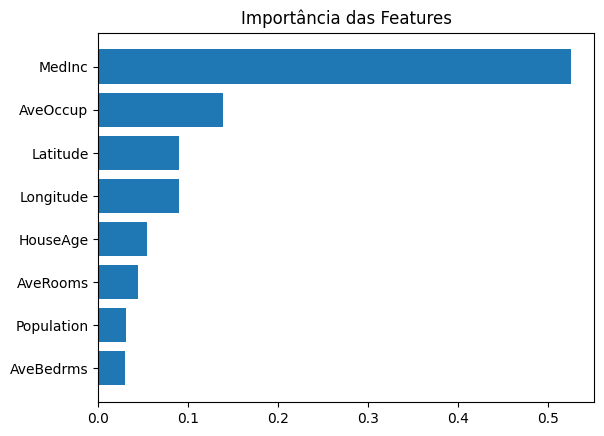

In [16]:
#gridSearchCV
import matplotlib.pyplot as plt

# Obtenha o melhor estimador do GridSearchCV
best_model = grid_search.best_estimator_

# Verifique se o melhor modelo tem o atributo feature_importances_
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    sorted_indices = feature_importances.argsort()
    plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices])
    plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
    plt.title('Importância das Features')
    plt.show()
else:
    print("O melhor estimador não possui o atributo feature_importances_.")

Salvar o modelo treinado

In [17]:
import pickle

# Definir o nome do arquivo onde o modelo será salvo
filename = '../model_trained/model_regression_immobile.pkl'

# Salvar o modelo no arquivo
with open(filename, 'wb') as file:
    pickle.dump(grid_search, file)

Agora que temos todo o pipeline do 1 ao 8, precisamos evoluir para tirar do notebook e colocar em produção.